In [1]:
import IPython
import sys

def clean_notebook():
    IPython.display.clear_output(wait=True)
    print("Notebook cleaned.")

!pip install facenet-pytorch
!pip install opendatasets
# Clean up the notebook
clean_notebook()


Notebook cleaned.


# Download Dataset

https://www.kaggle.com/datasets/tapakah68/selfies-and-video-dataset-4-000-people

In [2]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/tapakah68/selfies-and-video-dataset-4-000-people")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  tuchsanai


Your Kaggle Key:

  ········


Dataset URL: https://www.kaggle.com/datasets/tapakah68/selfies-and-video-dataset-4-000-people


100%|██████████| 666M/666M [00:41<00:00, 16.7MB/s] 


In [7]:
import pandas as pd

df = pd.read_csv("./selfies-and-video-dataset-4-000-people/selfie_and_video.csv")
df = df[df['type']=='video']

df

,files,type
2,/1/3.mp4,video
3,/1/4.mp4,video
6,/1/7.mp4,video
7,/1/8.mp4,video
10,/2/3.mp4,video
11,/2/4.mp4,video
14,/2/7.mp4,video
15,/2/8.mp4,video
18,/3/3.mp4,video
19,/3/4.mp4,video


# Display video

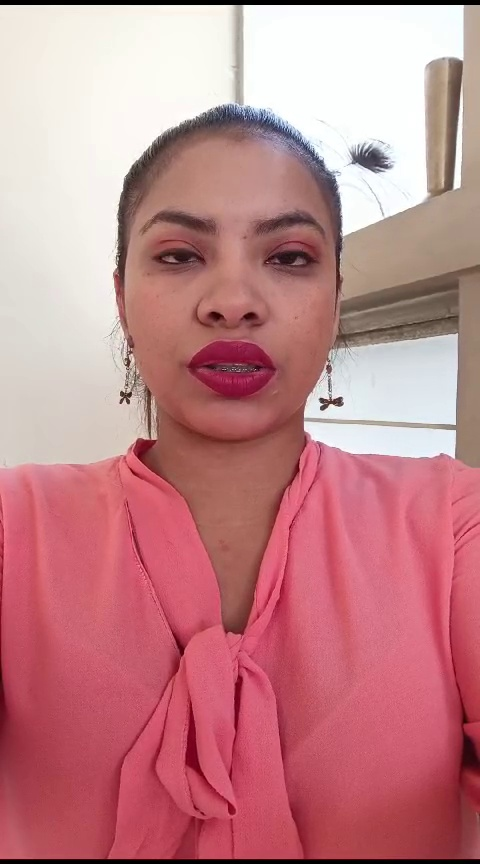

In [ ]:
import cv2
from IPython.display import display, Image, clear_output
import numpy as np

def play_video(video_path):
    """
    Play a video in a Jupyter Notebook.
    
    Args:
        video_path (str): Path to the video file.
    """
    # Open the video file
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print("Cannot open video file.")
        return

    try:
        while cap.isOpened():
            ret, frame = cap.read()
            
            if not ret:
                print("Stream stopped.")
                break

            # Convert the frame to JPEG format for display in Jupyter
            _, buffer = cv2.imencode('.jpg', frame)
            img_bytes = buffer.tobytes()

            # Display the frame in Jupyter Notebook
            display(Image(data=img_bytes))
            clear_output(wait=True)  # Clear previous frame for smoother playback

    finally:
        cap.release()
        print("Video stream ended.")

# Example usage
play_video('./selfies-and-video-dataset-4-000-people/files/10/3.mp4')


# Face detection from Webcam

In [ ]:
import cv2
import numpy as np
import torch
from facenet_pytorch import MTCNN
from IPython.display import display, clear_output
from PIL import Image
import time

# Initialize the MTCNN model for face detection
mtcnn = MTCNN(keep_all=True, device=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu'))

# Our sketch generating function for the detected face
def sketch(image):
    # Convert image to grayscale
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Clean up image using Gaussian Blur
    img_gray_blur = cv2.GaussianBlur(img_gray, (5, 5), 0)
    
    # Extract edges
    canny_edges = cv2.Canny(img_gray_blur, 10, 70)
    
    # Invert binarize the image
    _, mask = cv2.threshold(canny_edges, 70, 255, cv2.THRESH_BINARY_INV)
    return mask

# Open the webcam
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not access the webcam.")
    cap.release()
    raise RuntimeError("Webcam initialization failed.")

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    if not ret:
        print("Failed to grab frame.")
        break
    
    # Convert frame to RGB (MTCNN expects RGB images)
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    # Detect faces using MTCNN
    boxes, _ = mtcnn.detect(rgb_frame)
    
    if boxes is not None:
        for box in boxes:
            x1, y1, x2, y2 = map(int, box)
            # Ensure the bounding box is within the frame
            x1, y1 = max(0, x1), max(0, y1)
            x2, y2 = min(frame.shape[1], x2), min(frame.shape[0], y2)
            
            # Extract the face region
            face_region = frame[y1:y2, x1:x2]
            
            # Apply sketch effect to the face region
            face_sketch = sketch(face_region)
            
            # Convert sketch to 3 channels to overlay on the original frame
            face_sketch_color = cv2.cvtColor(face_sketch, cv2.COLOR_GRAY2BGR)
            
            # Replace the face region in the original frame with the sketch
            frame[y1:y2, x1:x2] = cv2.resize(face_sketch_color, (x2 - x1, y2 - y1))
    
    # Resize video frame for display in Jupyter
    ratio = 800.0 / frame.shape[1]
    frame = cv2.resize(frame, (800, int(frame.shape[0] * ratio)))
    
    # Convert frame to PIL Image for Jupyter display
    display_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    pil_image = Image.fromarray(display_frame)
    
    # Clear previous output and display the frame
    clear_output(wait=True)
    display(pil_image)
        
        

# Release camera
cap.release()
